# 1. Imports

In [920]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Função auxiliar para exibir imagens

(np.float64(-0.5), np.float64(1599.5), np.float64(1002.5), np.float64(-0.5))

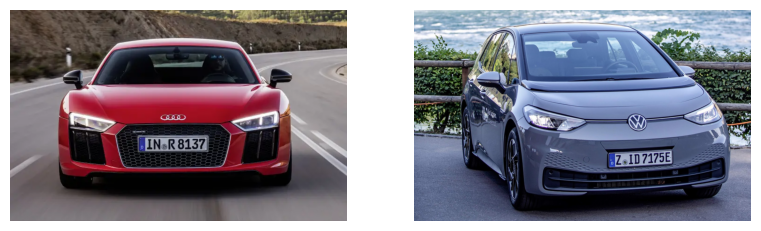

In [921]:
plt.figure(figsize=(20,20))
img_carro_1 = cv2.imread('placacarroeu1.jpg')
carro_1_rgb = cv2.cvtColor(img_carro_1, cv2.COLOR_BGR2RGB)
plt.subplot(1,4,2)
plt.imshow(carro_1_rgb)
plt.axis('off')
img_carro_2 = cv2.imread('placacarroeu2.jpg')
carro_2_rgb = cv2.cvtColor(img_carro_2, cv2.COLOR_BGR2RGB)
plt.subplot(1,4,3)
plt.imshow(carro_2_rgb)
plt.axis('off')


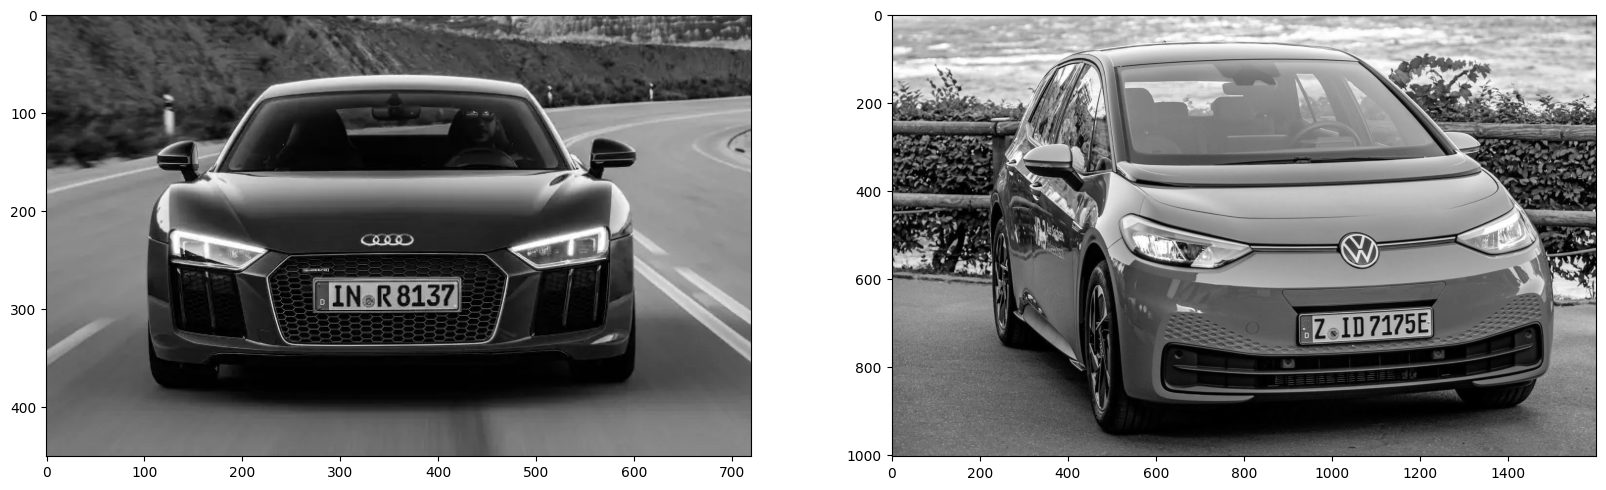

In [922]:
plt.figure(figsize=(20,20))
gray_1 = cv2.cvtColor(img_carro_1, cv2.COLOR_RGB2GRAY)
plt.subplot(1,2,1)
plt.imshow(gray_1, cmap= 'gray')
gray_2 = cv2.cvtColor(img_carro_2, cv2.COLOR_RGB2GRAY)
plt.subplot(1,2,2)
plt.imshow(gray_2, cmap= 'gray')

edges = cv2.Canny(gray_1, 50, 150, apertureSize=5)
edges = cv2.Canny(gray_2, 50, 150, apertureSize=3)


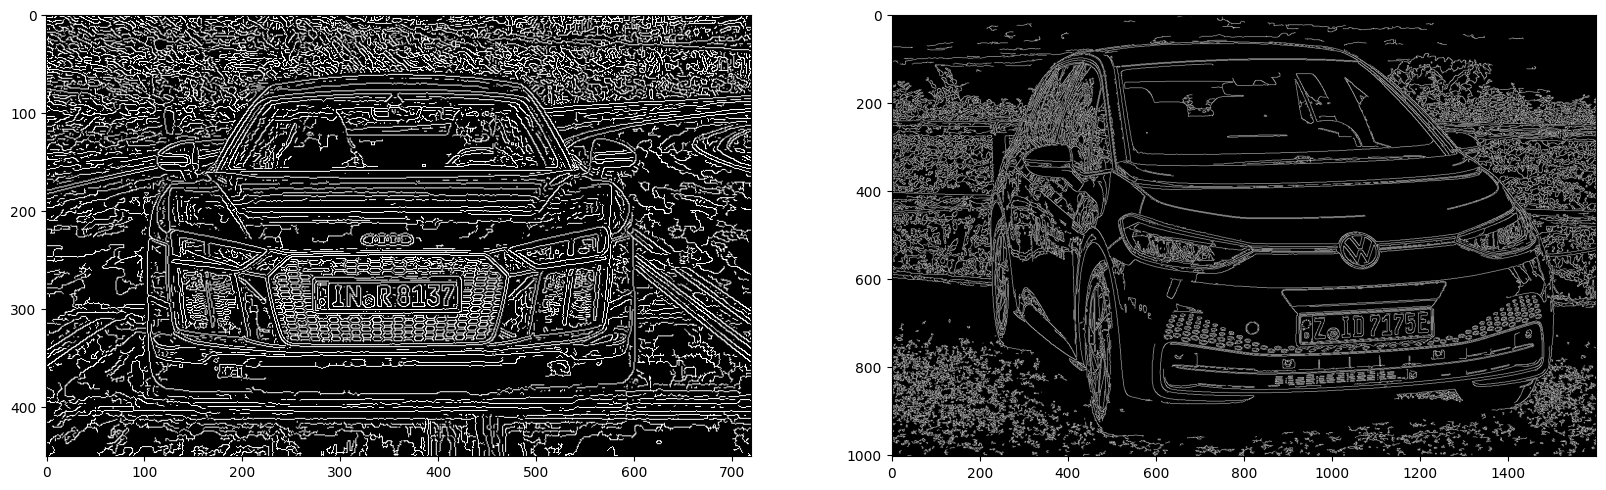

In [923]:
plt.figure(figsize=(20,20))
edges_1 = cv2.Canny(gray_1, 50, 150, apertureSize=5)
edges_2 = cv2.Canny(gray_2, 50, 150, apertureSize=3)

plt.subplot(1,2,1)
plt.imshow(edges_1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(edges_2, cmap='gray')


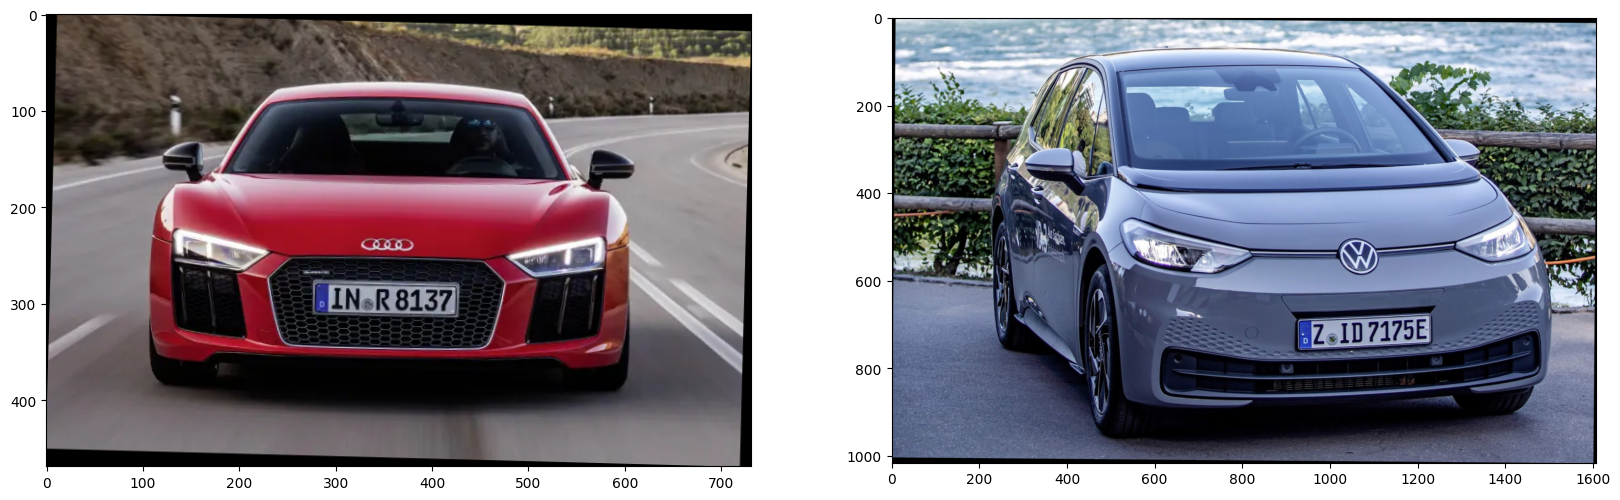

In [924]:
# 5. Detectar linhas retas com HoughLinesP
lines_1 = cv2.HoughLinesP(edges_1, rho=1, theta=np.pi/180, threshold=100,
                        minLineLength=100, maxLineGap=10)

if lines_1 is None or len(lines_1) < 2:
    print("Linhas insuficientes para correção. Mostrando imagem original.")
    rotated = carro_1_rgb.copy()
else:
    # 5.1 Ordenar pelas 2 linhas mais longas
    longest_lines = sorted(lines_1, key=lambda l: 
        np.linalg.norm((l[0][2]-l[0][0], l[0][3]-l[0][1])), 
        reverse=True)[:2]

    # 5.2 Calcular o ângulo médio dessas 2 linhas
    angles = []
    for line in longest_lines:
        x1, y1, x2, y2 = line[0]
        angle = np.degrees(np.arctan2(y2 - y1, x2 - x1))
        angles.append(angle)
    average_angle = np.mean(angles)

    # 5.3 Rotacionar a imagem de acordo com o ângulo médio
    height, width = img_carro_1.shape[:2]
    center = (width // 2, height // 2)
    M = cv2.getRotationMatrix2D(center, average_angle, 1.0)
    cos_theta = abs(M[0, 0])
    sin_theta = abs(M[0, 1])
    new_width = int((height * sin_theta) + (width * cos_theta))
    new_height = int((height * cos_theta) + (width * sin_theta))
    M[0, 2] += (new_width / 2) - center[0]
    M[1, 2] += (new_height / 2) - center[1]
    rotated = cv2.warpAffine(carro_1_rgb, M, (new_width, new_height),
                             borderMode=cv2.BORDER_CONSTANT,
                             borderValue=(0, 0, 0))

# 5. Detectar linhas retas com HoughLinesP
lines_2 = cv2.HoughLinesP(edges_2, rho=1, theta=np.pi/180, threshold=100,
                        minLineLength=100, maxLineGap=10)

if lines_2 is None or len(lines_2) < 2:
    print("Linhas insuficientes para correção. Mostrando imagem original.")
    rotated_2 = carro_2_rgb.copy()
else:
    # 5.1 Ordenar pelas 2 linhas mais longas
    longest_lines = sorted(lines_2, key=lambda l: 
        np.linalg.norm((l[0][2]-l[0][0], l[0][3]-l[0][1])), 
        reverse=True)[:2]

    # 5.2 Calcular o ângulo médio dessas 2 linhas
    angles = []
    for line in longest_lines:
        x1, y1, x2, y2 = line[0]
        angle = np.degrees(np.arctan2(y2 - y1, x2 - x1))
        angles.append(angle)
    average_angle = np.mean(angles)

    # 5.3 Rotacionar a imagem de acordo com o ângulo médio
    height, width = img_carro_2.shape[:2]
    center = (width // 2, height // 2)
    M = cv2.getRotationMatrix2D(center, average_angle, 1.0)
    cos_theta = abs(M[0, 0])
    sin_theta = abs(M[0, 1])
    new_width = int((height * sin_theta) + (width * cos_theta))
    new_height = int((height * cos_theta) + (width * sin_theta))
    M[0, 2] += (new_width / 2) - center[0]
    M[1, 2] += (new_height / 2) - center[1]
    rotated_2 = cv2.warpAffine(carro_2_rgb, M, (new_width, new_height),
                             borderMode=cv2.BORDER_CONSTANT,
                             borderValue=(0, 0, 0))

# 6. Exibir a imagem rotacionada (placa aproximadamente alinhada)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow( rotated, cmap=None)
plt.subplot(1,2,2)
plt.imshow( rotated_2, cmap=None)


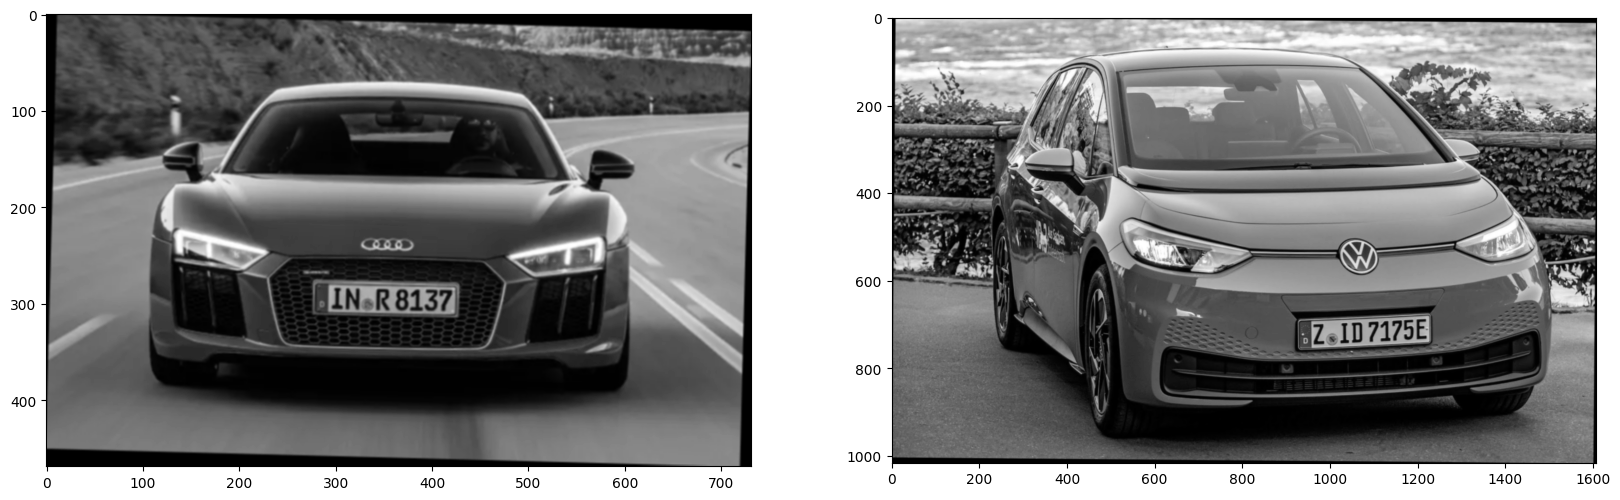

In [925]:
# 7. Converter a imagem rotacionada para tons de cinza e aplicar blur
rot_gray = cv2.cvtColor(rotated, cv2.COLOR_RGB2GRAY)
# Aplicar um leve blur para suavizar ruídos antes da binarização
rot_blur = cv2.GaussianBlur(rot_gray, (3, 3), 0)
#
rot_gray_2 = cv2.cvtColor(rotated_2, cv2.COLOR_RGB2GRAY)
rot_blur_2 = cv2.GaussianBlur(rot_gray_2, (3, 3), 0)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow( rot_blur, cmap='gray')
plt.subplot(1,2,2)
plt.imshow( rot_blur_2, cmap='gray')


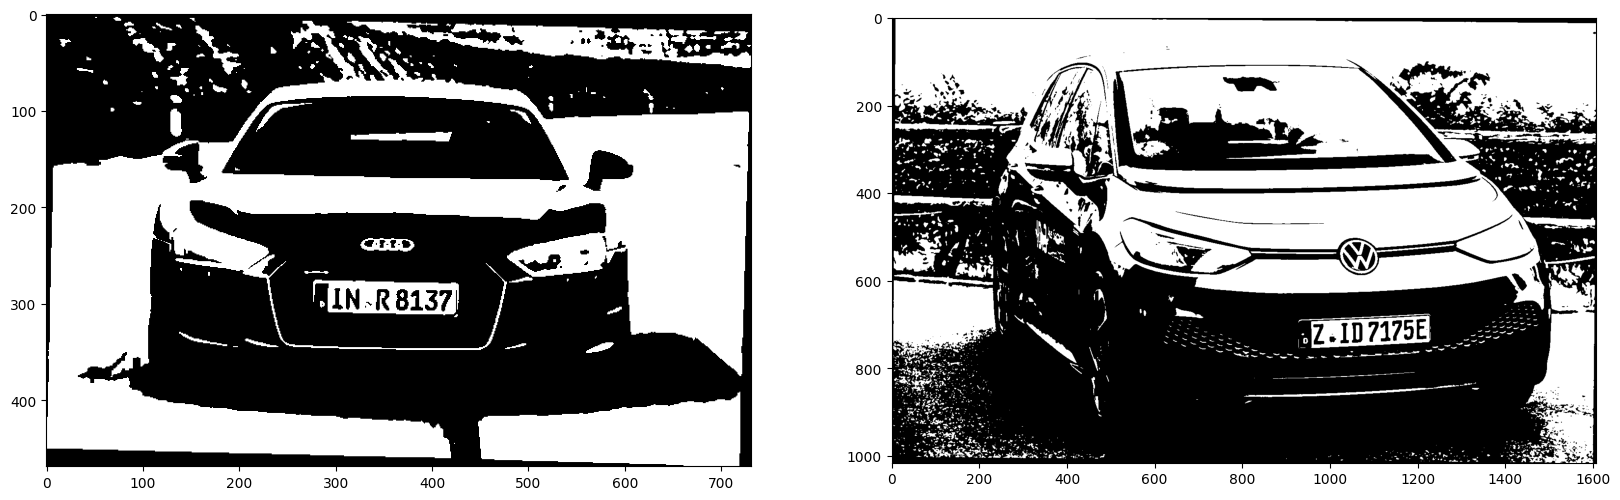

In [926]:
# 8. Binarizar a imagem (thresholding) – técnica simples de Otsu
_, thresh = cv2.threshold(rot_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, thresh_2 = cv2.threshold(rot_blur_2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(thresh, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(thresh_2, cmap='gray')


In [927]:
# 9. Encontrar contornos na imagem binarizada
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_2, _ = cv2.findContours(thresh_2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


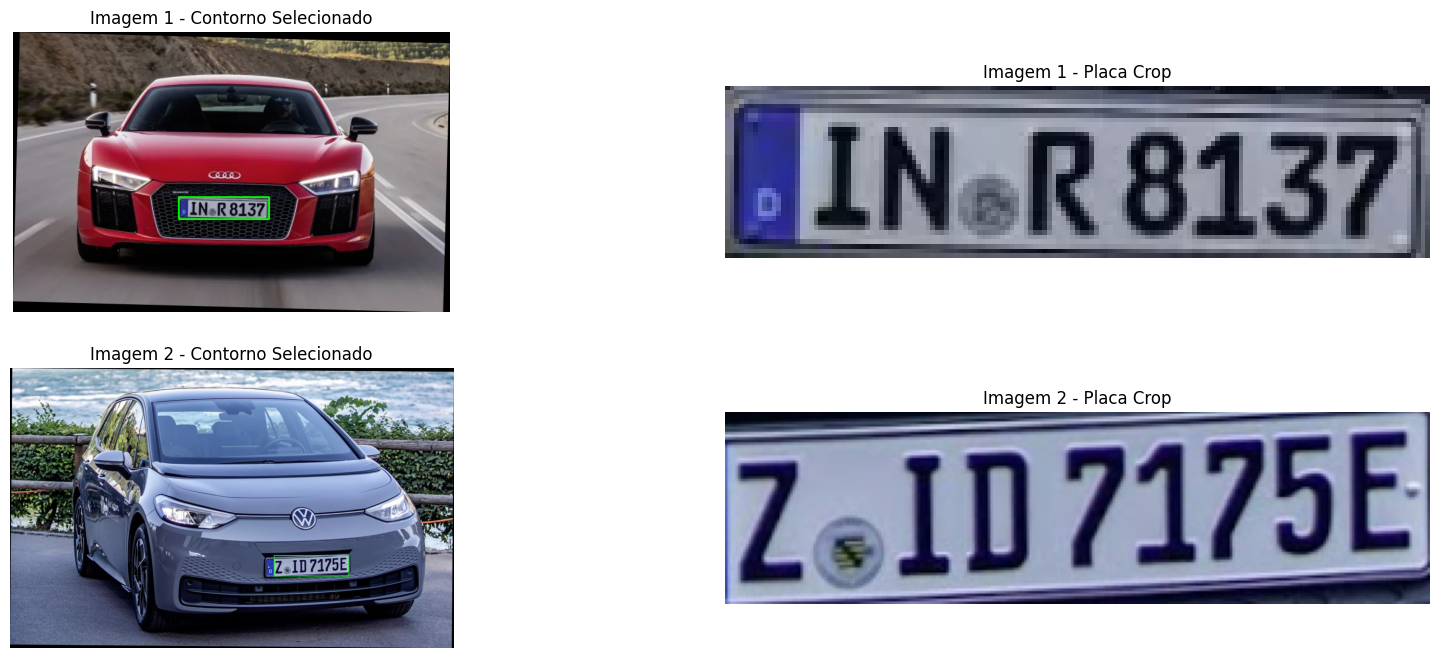

In [928]:
# ===================================================================
# 2) FILTRAGEM DE CONTORNOS – IMAGEM 1
# ===================================================================
h_rot, w_rot = rot_blur.shape[:2]
possible_plates = []

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = w / float(h)
    area = cv2.contourArea(cnt)

    # 1) Aspect‐ratio: placas normalmente têm AR entre ~3.0 e ~5.0
    cond_ar   = (4 < aspect_ratio < 5.0)

    # 2) Área mínima absoluta (descarta ruídos muito pequenos)
    cond_area = (area > 1500)

    # 3) Posição vertical: placa costuma estar na metade inferior da imagem
    cond_pos  = (y > h_rot * 0.4)

    # 4) Largura mínima relativa: placa ocupa boa parte da largura total
    cond_width = (w > w_rot * 0.15)

    if cond_ar and cond_area and cond_pos and cond_width:
        possible_plates.append((x, y, w, h, aspect_ratio, area))

# Ordenar candidatos por área (maior primeiro)
possible_plates = sorted(possible_plates, key=lambda b: (b[2] * b[3]), reverse=True)

# Garantindo que se não achar nada, devolve a imagem inteira
if len(possible_plates) == 0:
    print("Imagem 1: Não foi encontrado contorno compatível com placa.")
    placa_crop = rotated.copy()
else:
    x, y, w, h, ar, area = possible_plates[0]
    debug = rotated.copy()
    cv2.rectangle(debug, (x, y), (x + w, y + h), (0, 255, 0), 2)
    placa_crop = rotated[y : y + h, x : x + w]

# ===================================================================
# 3) FILTRAGEM DE CONTORNOS – IMAGEM 2
# ===================================================================
h_rot_2, w_rot_2 = rot_blur_2.shape[:2]
possible_plates_2 = []

for cnt_2 in contours_2:
    x2, y2, w2, h2 = cv2.boundingRect(cnt_2)     # agora usa cnt_2
    aspect_ratio_2 = w2 / float(h2)
    area_2 = cv2.contourArea(cnt_2)

    # 1) Aspect‐ratio: placas normalmente têm AR entre ~3.0 e ~5.0 (ou ajuste p/ cada caso)
    cond_ar_2   = (3.0 < aspect_ratio_2 < 5.0)

    # 2) Área mínima absoluta (descarta ruídos muito pequenos)
    cond_area_2 = (area_2 > 1500)

    # 3) Posição vertical: placa costuma estar na metade inferior da imagem
    cond_pos_2  = (y2 > h_rot_2 * 0.4)

    # 4) Largura mínima relativa: placa ocupa boa parte da largura total
    cond_width_2 = (w2 > w_rot_2 * 0.15)

    if cond_ar_2 and cond_area_2 and cond_pos_2 and cond_width_2:
        possible_plates_2.append((x2, y2, w2, h2, aspect_ratio_2, area_2))

# Ordenar candidatos por área (maior primeiro)
possible_plates_2 = sorted(possible_plates_2, key=lambda b: (b[2] * b[3]), reverse=True)

if len(possible_plates_2) == 0:
    print("Imagem 2: Não foi encontrado contorno compatível com placa.")
    placa_crop_2 = rotated_2.copy()
else:
    x2, y2, w2, h2, ar2, area2 = possible_plates_2[0]
    debug_2 = rotated_2.copy()
    cv2.rectangle(debug_2, (x2, y2), (x2 + w2, y2 + h2), (0, 255, 0), 2)
    placa_crop_2 = rotated_2[y2 : y2 + h2, x2 : x2 + w2]

# ===================================================================
# 4) EXIBIR OS RESULTADOS LADO A LADO
# ===================================================================
plt.figure(figsize=(20, 8))

plt.subplot(2, 2, 1)
plt.title("Imagem 1 - Contorno Selecionado")
plt.imshow(debug)          # debug da imagem 1 com retângulo
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Imagem 1 - Placa Crop")
plt.imshow(placa_crop)
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Imagem 2 - Contorno Selecionado")
plt.imshow(debug_2)        # debug da imagem 2 com retângulo
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Imagem 2 - Placa Crop")
plt.imshow(placa_crop_2)
plt.axis("off")

plt.show()
